Now let us walk through a normal NN project, here I will assume you have some images stored in the subdirectory '.fig/'

Now, I will use an autoencoder with there convolutional layers to demonstrate how this is done.

In [28]:
import tensorflow as tf                                                                                                                                                                                              
import os
import cv2
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
# define the input shape for the autoencoder                                   
input_shape = (256, 256, 3)         

In [4]:
# define the encoder architecture                                              
encoder = tf.keras.models.Sequential([                                         
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),                      
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),     
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),      
    tf.keras.layers.MaxPooling2D((2, 2), padding='same')
    ]) 

In [5]:
# define the decoder architecture
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(8, (3, 3), strides=2, activation='relu', padding='same', input_shape=(32, 32, 8)),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')  
    ]) 


In [6]:
# combine the encoder and decoder into an autoencoder                          
autoencoder = tf.keras.models.Sequential([encoder, decoder])                   
                                                                               
# compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

6


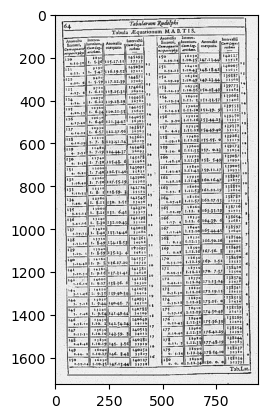

In [35]:
# load the images and scale them to 256x256
image_dir = './fig/'                                          
imag_in = ['Stamps_of_Germany_(DDR)_1971,_MiNr_1649.jpg', 'Kepler-1627-60-61.jpg', 'flower-carrier.jpg', 'Padding.jpg', 'Rudolphine_tables.jpg', 'keplertableslrg.jpg']
images=[]
for filename in imag_in:                                         
    img = cv2.imread(os.path.join(image_dir, filename))
    plt.imshow(img)   
    img = cv2.resize(img, (256, 256)) 
    images.append(img)
images = np.array(images)
print(len(images))

In [37]:
# Now let us split the data in training and testing

import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, images, test_size=2, random_state=4)

In [38]:
# normalize the pixel values to the range [0, 1]                               
images = images / 255.0
 
# train the autoencoder on the scaled images                                   
autoencoder.fit(x_train, y_train, epochs=10, batch_size=16)      

Epoch 1/10
1/1 [==============================] - 0s 179ms/step - loss: 0.6888
Epoch 2/10
1/1 [==============================] - 0s 93ms/step - loss: 0.6880
Epoch 3/10
1/1 [==============================] - 0s 99ms/step - loss: 0.6869
Epoch 4/10
1/1 [==============================] - 0s 98ms/step - loss: 0.6856
Epoch 5/10
1/1 [==============================] - 0s 94ms/step - loss: 0.6840
Epoch 6/10
1/1 [==============================] - 0s 96ms/step - loss: 0.6820
Epoch 7/10
1/1 [==============================] - 0s 96ms/step - loss: 0.6796
Epoch 8/10
1/1 [==============================] - 0s 96ms/step - loss: 0.6768
Epoch 9/10
1/1 [==============================] - 0s 94ms/step - loss: 0.6734
Epoch 10/10
1/1 [==============================] - 0s 96ms/step - loss: 0.6694
